In [1]:
import pandas as pd

input_file = 'before.txt'
output_csv_file = 'before_Franklin.csv'

df = pd.read_csv(input_file, sep='\t')

df.to_csv(output_csv_file, index=False)


In [2]:
import pandas as pd

input_file = 'after.txt'
output_csv_file = 'after_Franklin.csv'

df = pd.read_csv(input_file, sep='\t')

df.to_csv(output_csv_file, index=False)

In [24]:
before=pd.read_csv('before_Franklin.csv')
after=pd.read_csv('after_Franklin.csv')

In [25]:
def modified_columns(df):
    columns_to_drop = ['Index', 'TypesCountMean', 'TypesCountStdDev','Language','Modified','Author']
    df = df.drop(columns=columns_to_drop)
    columns_rename = {'TokensCount': 'Words', 'TypesCount': 'Types'}
    df = df.rename(columns=columns_rename)
    return  df

before=modified_columns(before)
before.to_csv('before.csv', index=False)

In [26]:
after=modified_columns(after)
after.to_csv('after.csv', index=False)

In [27]:
def ratio(data):
    data['Ratio']=data['Types']/data['Words']*100
    
def words_sentence(data):
    data['Words/Sentence']=data['Words']/data['Sentences']
    
ratio(before)
words_sentence(before)

ratio(after)
words_sentence(after)

In [28]:
before

,Words,Types,Sentences,Title,Ratio,Words/Sentence
0,10840,1550,419,Abraham_Lincoln_1852-07-06,14.298893,25.871122
1,33361,2445,1466,Abraham_Lincoln_1854-10-16,7.328917,22.756480
2,3221,881,128,Abraham_Lincoln_1858-06-16,27.351754,25.164062
3,13781,1439,526,Abraham_Lincoln_1860-02-27,10.441913,26.199620
4,154,98,9,Abraham_Lincoln_1861-02-11,63.636364,17.111111
...,...,...,...,...,...,...
509,2711,867,72,Woodrow_Wilson_1920-12-07,31.980819,37.652778
510,1091,481,22,Zachary_Taylor_1849-03-05,44.087993,49.590909
511,7639,1779,205,Zachary_Taylor_1849-12-04,23.288389,37.263415
512,1679,558,33,Zachary_Taylor_1850-01-23,33.234068,50.878788


In [29]:
after

,Words,Types,Sentences,Title,Ratio,Words/Sentence
0,4690,1212,227,Barack_Obama_2008-08-28,25.842217,20.660793
1,1961,659,80,Barack_Obama_2008-11-04,33.605303,24.512500
2,2406,890,109,Barack_Obama_2009-01-20,36.990856,22.073394
3,877,388,32,Barack_Obama_2009-01-29,44.241733,27.406250
4,2472,848,109,Barack_Obama_2009-02-07,34.304207,22.678899
...,...,...,...,...,...,...
456,4531,1298,249,Ronald_Reagan_1988-08-15,28.647098,18.196787
457,4968,1346,192,Ronald_Reagan_1988-09-26,27.093398,25.875000
458,282,136,19,Ronald_Reagan_1988-11-11,48.226950,14.842105
459,7121,1772,296,Ronald_Reagan_1988-12-16,24.884145,24.057432


In [30]:
def average_word_diversity(data):
    return data['Ratio'].mean()

average_word_diversity(before)

33.291472979985905

In [31]:
average_word_diversity(after)

31.27865941514018

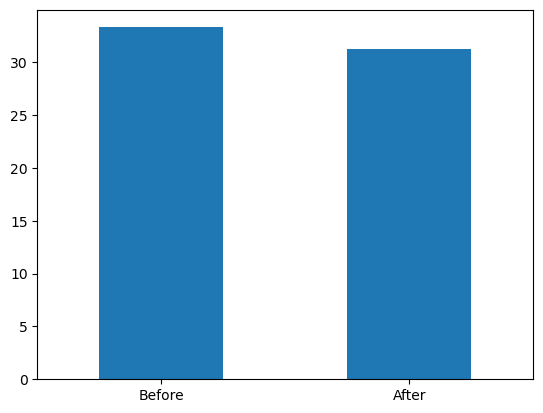

In [32]:
import matplotlib.pyplot as plt
wd=pd.Series([average_word_diversity(before),average_word_diversity(after)], index=['Before','After'])
ax = wd.plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


In [33]:
def average_sentence_length(data):
    return data['Words/Sentence'].mean()

average_sentence_length(before)

41.74388601815696

In [34]:
average_sentence_length(after)

20.585760816546227

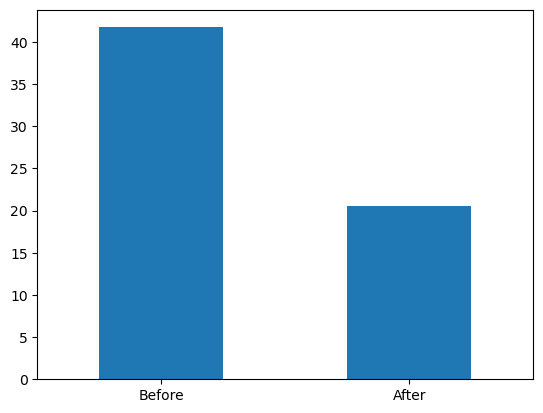

In [35]:
wd=pd.Series([average_sentence_length(before),average_sentence_length(after)], index=['Before','After'])
ax = wd.plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()